# Importation du dataframe et des modules nécessaires

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import folium
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
from math import pi

In [2]:
os.chdir(r"C:\Users\jbfal\OneDrive\Bureau\Open Classrooms\Formation\Projet 9 (24.01.2024)\Donnees visuellement orga")

In [3]:
fusion_finale = pd.read_csv("Fusion Finale.csv", sep = ",", encoding='utf-8')
donnees_geo = pd.read_csv("Donnees geo.csv", sep = ";", encoding='latin1')

In [4]:
fusion_finale.head()

,Pays,Année,Efficacité loi,Essor secteur privé,Stabilité politique,Réseau routier (km),Routes pavées (km),Routes pavées (%),Chemins de fer (km),Aéroports,...,Nourriture : Oeufs,Nourriture : Viande de Volailles,Pertes : Abats Comestible,Pertes : Graisses Animales Crue,Pertes : Oeufs,Production : Abats Comestible,Production : Graisses Animales Crue,Production : Oeufs,Production : Viande de Volailles,Semences : Oeufs
0,Andorre,2000,1.29,1.22,1.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2000,-1.78,-2.08,-2.44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,2000,-1.60,-1.51,-2.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albanie,2000,-1.02,-0.42,-0.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Émirats arabes unis,2000,0.66,0.69,0.98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# De quelles pays se passer ?

In [5]:
donnees_2017 = fusion_finale[fusion_finale["Année"] == 2017]

In [6]:
donnees_2017 = donnees_2017[donnees_2017["Population"] >= 100000]
donnees_2017.shape

(189, 54)

In [7]:
seuil_nan_a_respecter = len(donnees_2017.columns) * 0.5
donnees_2017 = donnees_2017.dropna(thresh = seuil_nan_a_respecter)
donnees_2017.shape

(167, 54)

In [8]:
donnees_2017.head()

,Pays,Année,Efficacité loi,Essor secteur privé,Stabilité politique,Réseau routier (km),Routes pavées (km),Routes pavées (%),Chemins de fer (km),Aéroports,...,Nourriture : Oeufs,Nourriture : Viande de Volailles,Pertes : Abats Comestible,Pertes : Graisses Animales Crue,Pertes : Oeufs,Production : Abats Comestible,Production : Graisses Animales Crue,Production : Oeufs,Production : Viande de Volailles,Semences : Oeufs
3265,Afghanistan,2017,-1.58,-1.37,-2.79,34903.0,17903.0,51.0,75.0,46.0,...,54.0,55.0,0.0,0.0,7.0,48.0,15.0,20.0,28.0,5.0
3266,Angola,2017,-1.04,-1.05,-0.39,43655.0,13600.0,31.0,2700.0,52.0,...,20.0,315.0,0.0,0.0,3.0,24.0,9.0,5.0,42.0,3.0
3267,Albanie,2017,-0.41,0.22,0.37,3945.0,0.0,0.0,334.0,3.0,...,42.0,47.0,0.0,0.0,8.0,14.0,4.0,51.0,13.0,0.0
3268,Émirats arabes unis,2017,0.77,1.00,0.60,4080.0,4080.0,100.0,869.0,43.0,...,71.0,412.0,1.0,0.0,3.0,19.0,9.0,56.0,48.0,6.0
3269,Argentine,2017,-0.24,-0.20,0.16,281290.0,117616.0,42.0,36966.0,916.0,...,681.0,1856.0,27.0,11.0,41.0,545.0,316.0,813.0,2161.0,84.0


In [9]:
print(donnees_2017.isnull().any())

Pays                                                                                      False
Année                                                                                     False
Efficacité loi                                                                            False
Essor secteur privé                                                                       False
Stabilité politique                                                                       False
Réseau routier (km)                                                                       False
Routes pavées (km)                                                                        False
Routes pavées (%)                                                                         False
Chemins de fer (km)                                                                       False
Aéroports                                                                                 False
Population                              

In [10]:
pays = donnees_2017["Pays"].unique()
pays.shape

(167,)

## Low variance filter

In [11]:
variance = donnees_2017.var(numeric_only=True)
seuil_variance = 10000
colonnes_a_conserver = variance[variance > seuil_variance].index.tolist()
donnees_2017 = donnees_2017[colonnes_a_conserver]
donnees_2017.head()

,Réseau routier (km),Routes pavées (km),Chemins de fer (km),Aéroports,Population,PIB/habitant,Autres utilisations (non alimentaire) : Graisses Animales Crue,Disponibilité intérieure : Abats Comestible,Disponibilité intérieure : Graisses Animales Crue,Disponibilité intérieure : Oeufs,...,Nourriture : Graisses Animales Crue,Nourriture : Oeufs,Nourriture : Viande de Volailles,Pertes : Graisses Animales Crue,Pertes : Oeufs,Production : Abats Comestible,Production : Graisses Animales Crue,Production : Oeufs,Production : Viande de Volailles,Semences : Oeufs
3265,34903.0,17903.0,75.0,46.0,36296113.0,530.149863,0.0,53.0,15.0,74.0,...,15.0,54.0,55.0,0.0,7.0,48.0,15.0,20.0,28.0,5.0
3266,43655.0,13600.0,2700.0,52.0,29816766.0,2283.214233,0.0,56.0,9.0,28.0,...,9.0,20.0,315.0,0.0,3.0,24.0,9.0,5.0,42.0,3.0
3267,3945.0,0.0,334.0,3.0,2884169.0,4531.032207,0.0,17.0,4.0,50.0,...,5.0,42.0,47.0,0.0,8.0,14.0,4.0,51.0,13.0,0.0
3268,4080.0,4080.0,869.0,43.0,9487203.0,43063.967480,2.0,27.0,16.0,93.0,...,13.0,71.0,412.0,0.0,3.0,19.0,9.0,56.0,48.0,6.0
3269,281290.0,117616.0,36966.0,916.0,43937140.0,14613.035710,99.0,455.0,226.0,805.0,...,112.0,681.0,1856.0,11.0,41.0,545.0,316.0,813.0,2161.0,84.0


## Matrice de corrélation

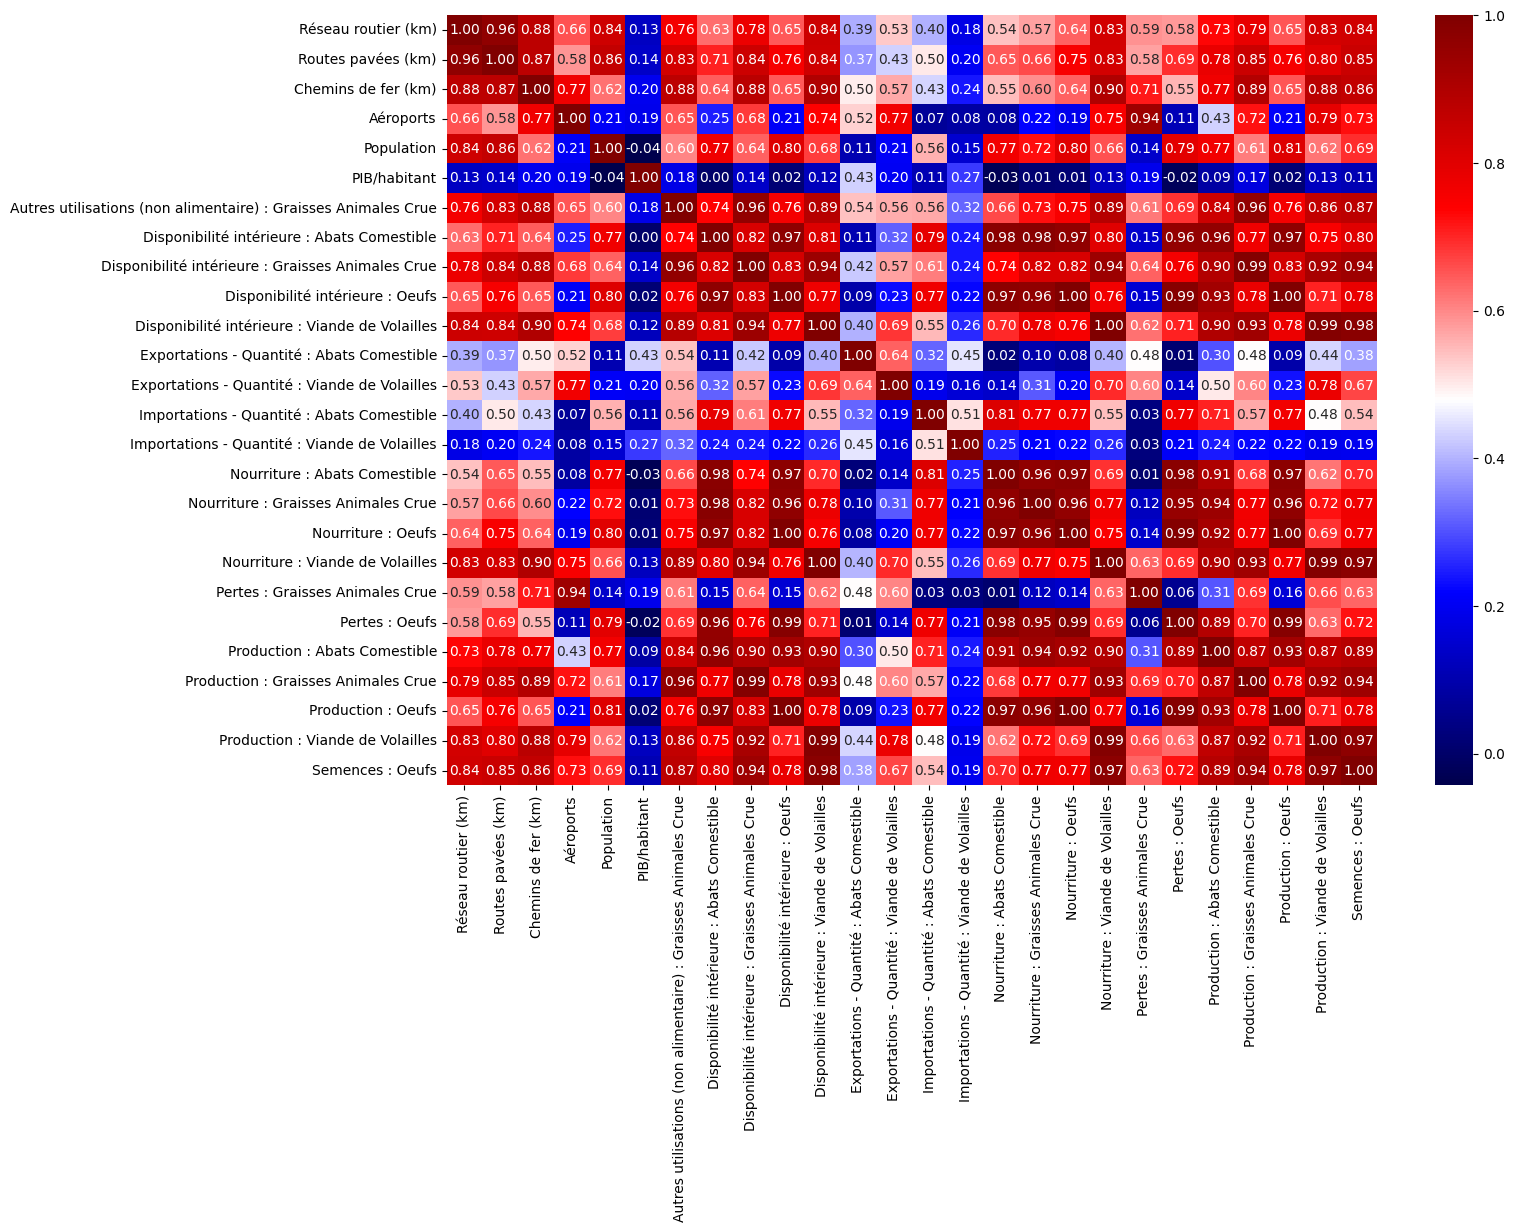

In [12]:
plt.figure(figsize=(15, 10))
correlation_matrix = donnees_2017.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="seismic", fmt=".2f")
plt.show()

In [13]:
colonnes_a_supprimer = ["Routes pavées (km)", "Chemins de fer (km)", "Aéroports", "Autres utilisations (non alimentaire) : Graisses Animales Crue", "Disponibilité intérieure : Abats Comestible", "Disponibilité intérieure : Graisses Animales Crue", "Disponibilité intérieure : Oeufs", "Disponibilité intérieure : Viande de Volailles", "Exportations - Quantité : Abats Comestible", "Importations - Quantité : Abats Comestible", "Nourriture : Abats Comestible", "Nourriture : Graisses Animales Crue", "Pertes : Graisses Animales Crue", "Production : Abats Comestible", "Production : Graisses Animales Crue", "Production : Oeufs", "Production : Viande de Volailles", "Semences : Oeufs"]
donnees_2017 = donnees_2017.drop(columns = colonnes_a_supprimer)

In [14]:
donnees_2017 = donnees_2017.reset_index(drop = True)
donnees_2017.shape

(167, 8)

# ACP

### Normalisation des données

In [15]:
donnees_2017_normalisees = StandardScaler().fit_transform(donnees_2017)

### Problème des outliers

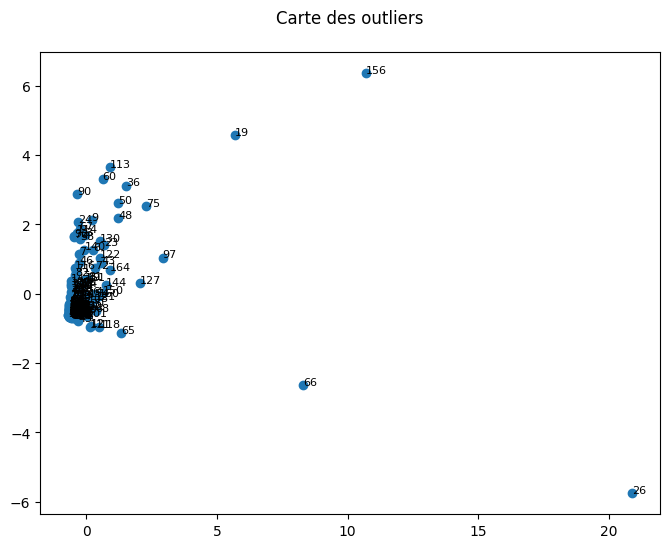

In [16]:
pca = PCA()
individus_proj = pca.fit_transform(donnees_2017_normalisees)

IFM_comp1 = individus_proj[:, 0]
IFM_comp2 = individus_proj[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(IFM_comp1, IFM_comp2)

for i, txt in enumerate(donnees_2017.index):
    plt.annotate(txt, (IFM_comp1[i], IFM_comp2[i]), fontsize=8)

plt.title("Carte des outliers\n")
plt.show()

In [17]:
indexes = [26, 48, 66, 19, 156, 90]
pays_outliers = donnees_2017.iloc[indexes]
pays_outliers.head()

,Réseau routier (km),Population,PIB/habitant,Exportations - Quantité : Viande de Volailles,Importations - Quantité : Viande de Volailles,Nourriture : Oeufs,Nourriture : Viande de Volailles,Pertes : Oeufs
26,5350000.0,1.421022e+09,8817.045496,576.0,452.0,32529.0,17518.0,1824.0
48,1053215.0,6.484251e+07,38781.049490,501.0,506.0,747.0,1485.0,8.0
66,6700000.0,1.338677e+09,1957.969814,4.0,0.0,4349.0,2965.0,243.0
19,2000000.0,2.078338e+08,9896.717511,4223.0,3.0,1616.0,9982.0,85.0
156,6832000.0,3.250848e+08,59907.754260,3692.0,123.0,5061.0,18100.0,128.0


### Suppression des outliers et réinitialisation des index

In [18]:
donnees_2017 = donnees_2017.drop(indexes).reset_index(drop=True)
donnees_2017_normalisees = pd.DataFrame(np.delete(donnees_2017_normalisees, indexes, axis=0)).reset_index(drop=True)
pays = pd.DataFrame(np.delete(pays, indexes, axis=0)).reset_index(drop=True)

## Éboulis des valeurs propres

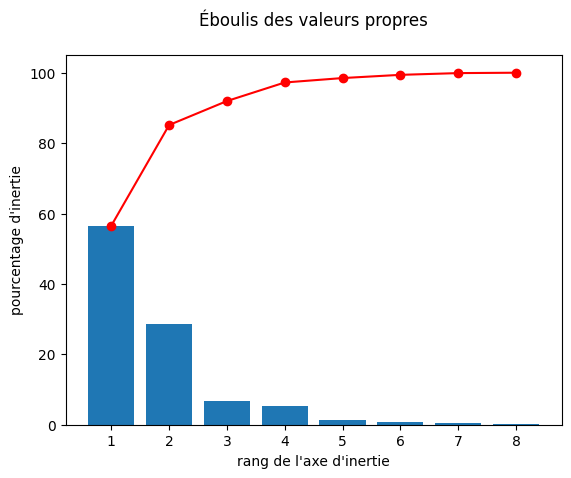

In [19]:
donnees_pca = pca.fit_transform(donnees_2017_normalisees)
inertie = pca.explained_variance_ratio_ * 100
scree = pca.explained_variance_
scree_cum = np.cumsum(inertie)
x_list = range(1, len(scree) + 1)

plt.bar(x_list, inertie)
plt.plot(x_list, scree_cum, c="red", marker="o")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Éboulis des valeurs propres\n")
plt.xticks(x_list)
plt.show()

## Cercle(s) de corrélation

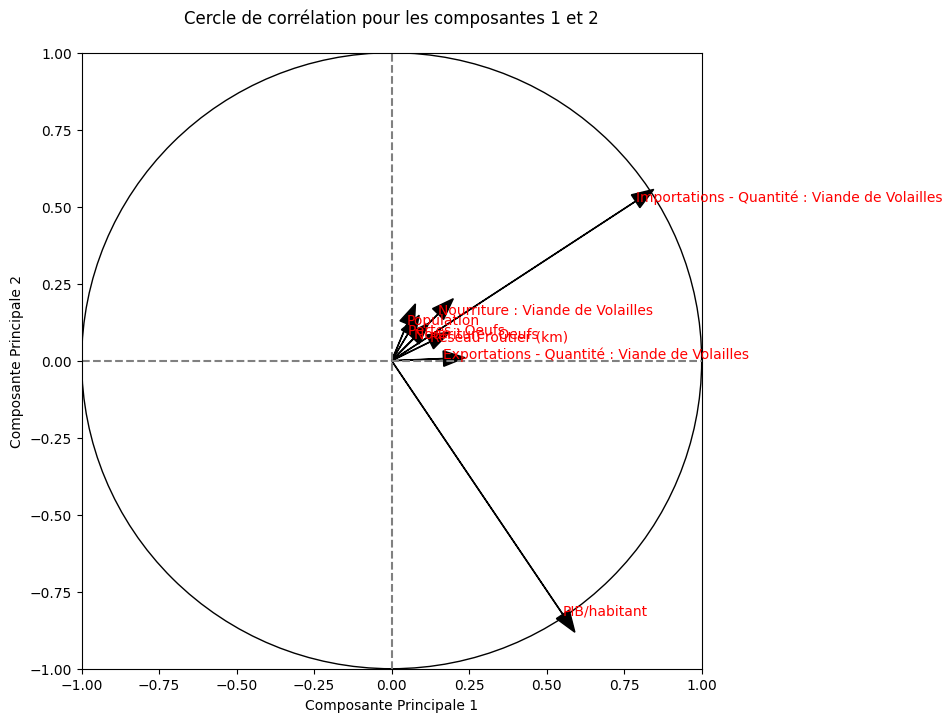

In [20]:
col_names = donnees_2017.columns

fig, ax = plt.subplots(figsize=(8, 8))

cercle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="black")
ax.add_artist(cercle)

for i in range(len(pca.components_[0])):
    ax.arrow(0, 0,
             pca.components_[0, i], pca.components_[1, i],
             head_width=0.05, head_length=0.07, fc="black", ec="black")
    ax.text(pca.components_[0, i], pca.components_[1, i], col_names[i], color="red")

ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_title("Cercle de corrélation pour les composantes 1 et 2\n")
ax.axhline(0, color="grey", linestyle="--")
ax.axvline(0, color="grey", linestyle="--")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

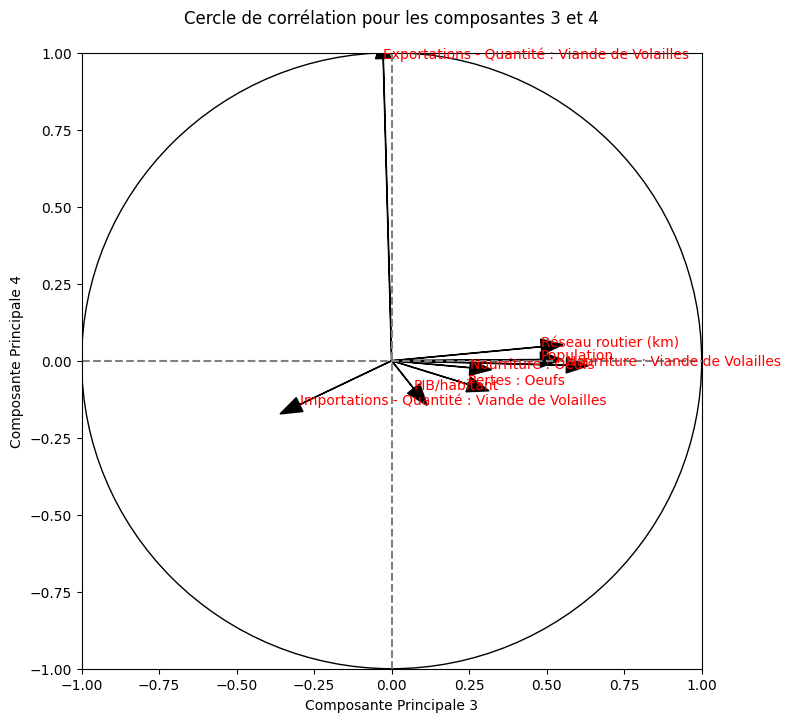

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

cercle_2 = plt.Circle((0, 0), 1, facecolor="none", edgecolor="black")

ax.add_artist(cercle_2)

for i in range(len(pca.components_[0])):
    ax.arrow(0, 0,
             pca.components_[2, i], pca.components_[3, i],
             head_width=0.05, head_length=0.07, fc="black", ec="black")
    ax.text(pca.components_[2, i], pca.components_[3, i], col_names[i], color='red')

ax.set_xlabel("Composante Principale 3")
ax.set_ylabel("Composante Principale 4")
ax.set_title("Cercle de corrélation pour les composantes 3 et 4\n")
ax.axhline(0, color="grey", linestyle="--")
ax.axvline(0, color="grey", linestyle="--")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

In [22]:
donnees_2017 = donnees_2017.drop(["Nourriture : Oeufs", "Réseau routier (km)", "Population", "Pertes : Oeufs"], axis=1)

## Classification ascendante hiérarchique

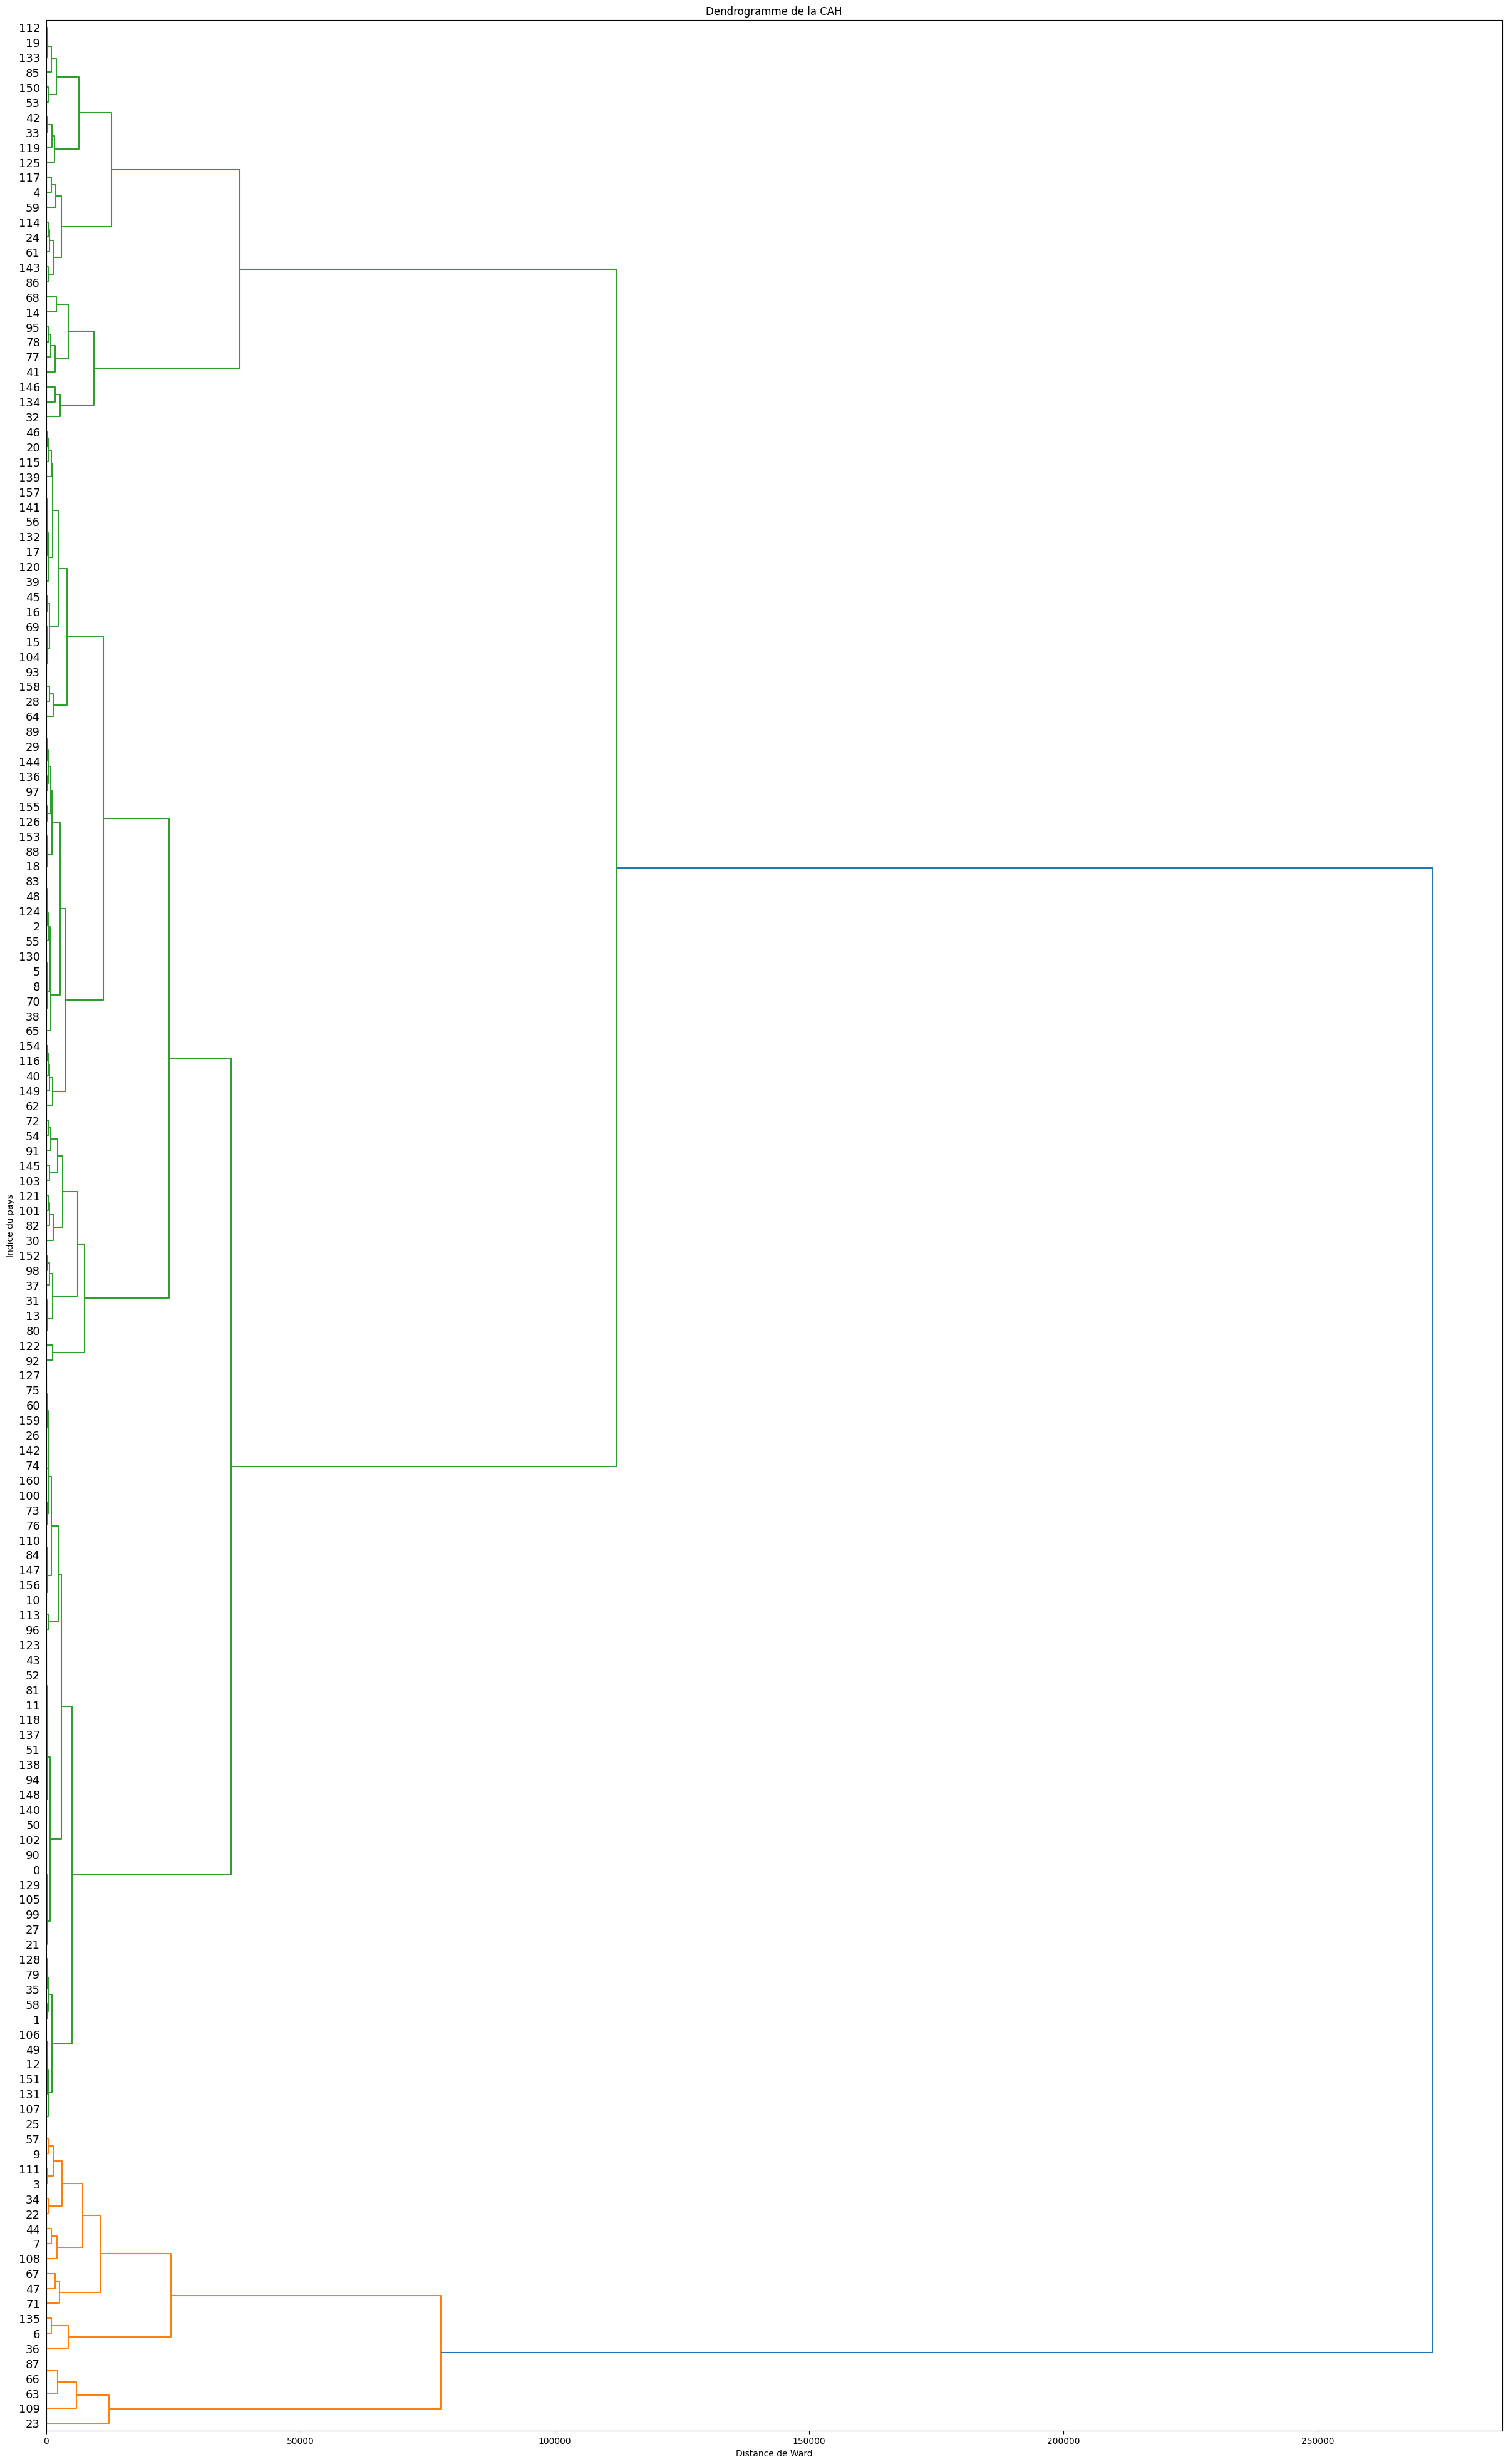

In [23]:
colonnes_cah = ["PIB/habitant", "Exportations - Quantité : Viande de Volailles", "Importations - Quantité : Viande de Volailles", "Nourriture : Viande de Volailles"]
donnees_cah = donnees_2017[colonnes_cah]

donnees_cah = donnees_cah.fillna(0)

pca = PCA(n_components = 2)
donnees_reduites = pca.fit_transform(donnees_cah)

Z = hierarchy.linkage(donnees_reduites, method="ward")
plt.figure(figsize=(30, 50))
dn = hierarchy.dendrogram(Z, labels=donnees_cah.index, orientation="right", leaf_font_size=13)
plt.title("Dendrogramme de la CAH")
plt.xlabel("Distance de Ward")
plt.ylabel("Indice du pays")

plt.show()

# Le clustering

In [24]:
coord = donnees_2017.values
nb_clusters_a_tester = 10
test_clusters = [i for i in range(2, nb_clusters_a_tester)]

## Méthode du coude

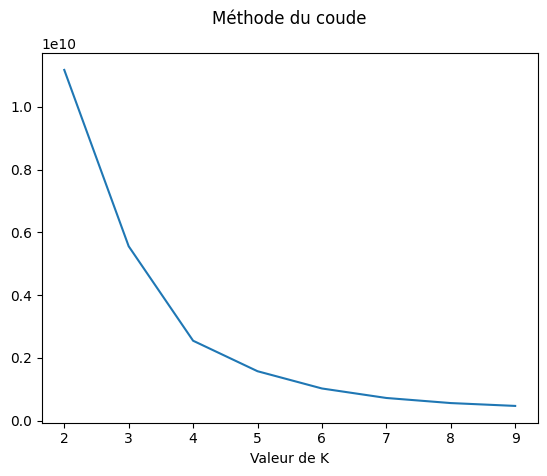

In [25]:
coude = []

for i in test_clusters:
    cls = KMeans(n_clusters=i, n_init=10)
    cls.fit(coord)
    coude.append(cls.inertia_)

plt.plot(test_clusters, coude)
plt.title("Méthode du coude\n")
plt.xlabel("Valeur de K")
plt.show()

## Score silhouette

Score de silhouette le plus élevé : 0.78


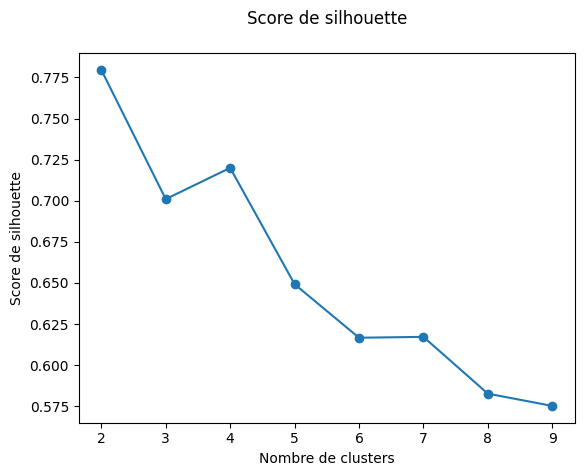

In [26]:
silhouette = []

for num_clusters in test_clusters:
    cls = KMeans(n_clusters = num_clusters, n_init = 50, init = "k-means++")
    cls.fit(coord)
    silh = metrics.silhouette_score(coord, cls.labels_)
    silhouette.append(silh)

print(f"Score de silhouette le plus élevé : {max(silhouette):.2f}")

plt.plot(test_clusters, silhouette, marker = "o")
plt.title("Score de silhouette\n")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.show()

## Indice Davies-Bouldin

Score Davies-Bouldin le plus bas : 0.38884203823233804


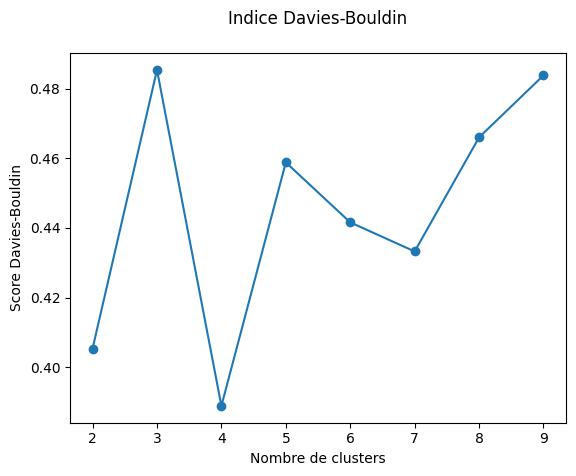

In [27]:
DB = []

for num_clusters in test_clusters:
    cls = KMeans(n_clusters = num_clusters, n_init = 50, init = "k-means++")
    cls.fit(coord)
    db = metrics.davies_bouldin_score(coord, cls.labels_)
    DB.append(db)

print(f"Score Davies-Bouldin le plus bas : {min(DB)}")

plt.plot(test_clusters, DB, marker = "o")
plt.title("Indice Davies-Bouldin\n")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score Davies-Bouldin")
plt.show()

### Réattribution des noms de pays dans le dataframe

In [28]:
donnees_2017_avec_pays = pd.concat([donnees_2017, pays], axis=1)
donnees_2017_avec_pays = donnees_2017_avec_pays.rename(columns={0: "Pays"})

In [29]:
donnees_2017_avec_pays.shape

(161, 5)

In [30]:
donnees_2017.shape

(161, 4)

# K-means

## Clustering

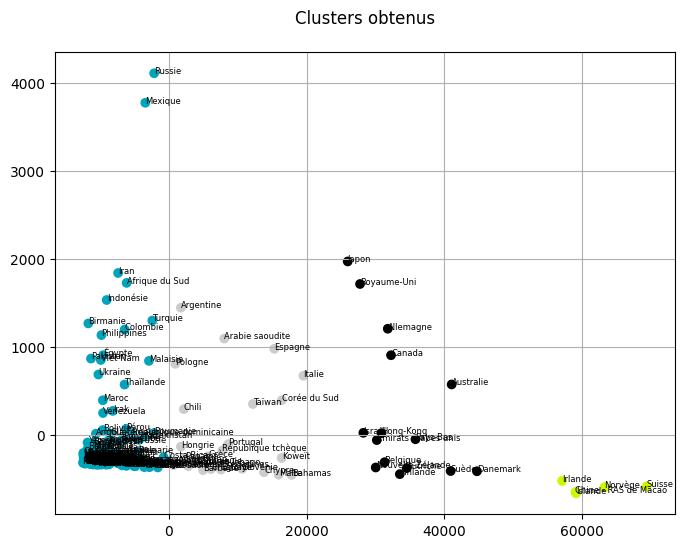

In [31]:
kmeans = KMeans(n_clusters = 4, n_init = 10)
kmeans.fit(donnees_2017)
donnees_2017["Cluster"] = kmeans.labels_ + 1
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(donnees_2017)

plt.figure(figsize = (8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c = donnees_2017["Cluster"], cmap = "nipy_spectral")

for i, (x, y) in enumerate(pca_result):
    plt.text(x, y, donnees_2017_avec_pays["Pays"][i], fontsize=6)

plt.title("Clusters obtenus\n")
plt.grid()
plt.show()

In [32]:
donnees_2017_avec_pays["Cluster"] = donnees_2017["Cluster"]
donnees_2017["Pays"] = donnees_2017_avec_pays["Pays"]

## Radar

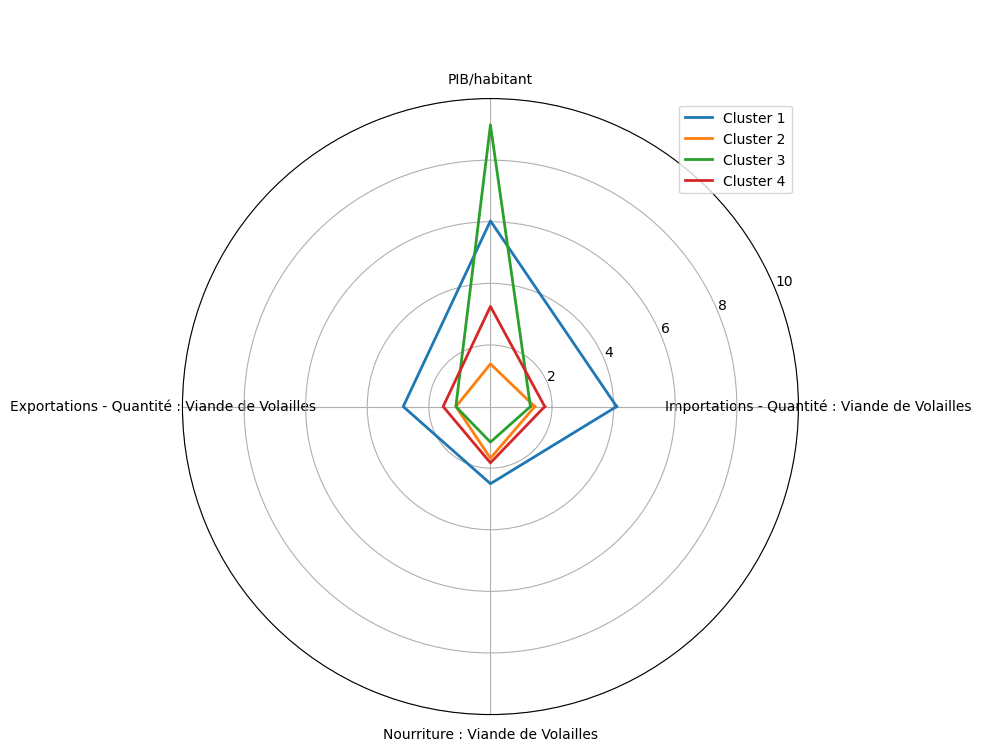

In [33]:
categories = [ 
    "Importations - Quantité : Viande de Volailles", 
    "PIB/habitant", 
    "Exportations - Quantité : Viande de Volailles", 
    "Nourriture : Viande de Volailles"
]

data_normalisees = donnees_2017.copy()
data_normalisees[categories] = (donnees_2017[categories] - donnees_2017[categories].min()) / (donnees_2017[categories].max() - donnees_2017[categories].min()) * 9 + 1

moyennes_par_cluster_normalisees = data_normalisees.groupby('Cluster').mean(numeric_only=True).reset_index()

nombre_caracteristiques = len(categories)
angles = np.linspace(0, 2 * np.pi, nombre_caracteristiques, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_thetagrids(np.degrees(angles[:-1]), categories)

ax.set_ylim(0, 10)

for i, row in moyennes_par_cluster_normalisees.iterrows():
    data = row[categories].tolist()
    data += data[:1]
    ax.plot(angles, data, linewidth=2, linestyle="solid", label=f'Cluster {int(row["Cluster"])}')

plt.legend()
plt.title("Comparaison des Clusters\n", size=20, color="white")

plt.show()

## Composition des clusters

### Liste des clusters

In [34]:
composition_clusters = {}

for id_cluster, groupe in donnees_2017.groupby("Cluster"):
    composition_clusters[id_cluster] = groupe["Pays"].tolist()

for id_cluster, countries in composition_clusters.items():
    print(f"Cluster {id_cluster} :")
    print(", ".join(countries))
    print("\n")

Cluster 1 :
Émirats arabes unis, Australie, Autriche, Belgique, Canada, Allemagne, Danemark, Finlande, Royaume-Uni, Hong-Kong, Israël, Japon, Pays-Bas, Nouvelle-Zélande, Suède


Cluster 2 :
Afghanistan, Angola, Albanie, Arménie, Azerbaïdjan, Bénin, Burkina Faso, Bangladesh, Bulgarie, Bosnie-Herzégovine, Biélorussie, Belize, Bolivie, Botswana, République centrafricaine, Côte d'Ivoire, Cameroun, Congo, Colombie, Cap-Vert, Costa Rica, Cuba, Djibouti, République dominicaine, Algérie, Équateur, Égypte, Éthiopie, Fidji, Gabon, Géorgie, Ghana, Guinée, Gambie, Guinée-Bissau, Grenade, Guatemala, Guyana, Honduras, Haïti, Indonésie, Iran, Irak, Jamaïque, Jordanie, Kazakhstan, Kenya, Kirghizistan, Cambodge, Kiribati, Laos, Liban, Libéria, Sainte-Lucie, Sri Lanka, Lesotho, Maroc, Moldavie, Madagascar, Maldives, Mexique, Macédoine du Nord, Mali, Birmanie, Mongolie, Monténégro, Mozambique, Mauritanie, Maurice, Malawi, Malaisie, Namibie, Niger, Nigeria, Nicaragua, Népal, Pakistan, Pérou, Philippines, 

### Carte des clusters

In [35]:
donnees_2017 = donnees_2017.merge(donnees_geo, on = ["Pays"], how = "inner")
donnees_2017.head()

,PIB/habitant,Exportations - Quantité : Viande de Volailles,Importations - Quantité : Viande de Volailles,Nourriture : Viande de Volailles,Cluster,Pays,Latitude,Longitude
0,530.149863,0.0,29.0,55.0,2,Afghanistan,33.768006,66.238514
1,2283.214233,0.0,277.0,315.0,2,Angola,-11.877577,17.569124
2,4531.032207,0.0,38.0,47.0,2,Albanie,41.156986,20.181222
3,43063.967480,94.0,433.0,412.0,1,Émirats arabes unis,24.000249,53.999483
4,14613.035710,207.0,8.0,1856.0,4,Argentine,-34.996496,-64.967282


In [36]:
m = folium.Map(location=[0, 0], zoom_start=2)

feature_groups = {
    cluster: folium.FeatureGroup(name=f'Cluster {cluster}').add_to(m)
    for cluster in composition_clusters
}

colors = ['blue', 'green', 'red', 'purple']

for id_cluster, countries in composition_clusters.items():
    groupe_geo = donnees_geo[donnees_geo['Pays'].isin(countries)]
    
    for _, row in groupe_geo.iterrows():
        icon = folium.DivIcon(html=f"""<div style="font-family: 'Arial'; color: white; background-color: {colors[id_cluster-1]}; border-radius: 50%; width: 24px; height: 24px; display: flex; align-items: center; justify-content: center;">{id_cluster}</div>""")
        
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Pays']}",
            icon=icon
        ).add_to(feature_groups[id_cluster])

folium.LayerControl().add_to(m)

m

## (Quelques calculs pour ma présentation)

In [37]:
groupe_1 = ['Argentine', 'Chili', 'Uruguay']
groupe_2 = ['Bolivie', 'Colombie', 'Équateur', 'Guyana', 'Paraguay', 'Pérou', 'Suriname', 'Venezuela']

groupe_1_data = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(groupe_1)]
groupe_2_data = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(groupe_2)]

moyenne_groupe_1 = groupe_1_data['Nourriture : Viande de Volailles'].mean()
moyenne_groupe_2 = groupe_2_data['Nourriture : Viande de Volailles'].mean()

difference_pourcentage = ((moyenne_groupe_1 - moyenne_groupe_2) / moyenne_groupe_2) * 100

print(difference_pourcentage)

100.64686856806821


In [38]:
print(moyenne_groupe_1)

853.0


In [39]:
print(moyenne_groupe_2)

425.125


In [40]:
groupe_3 = ['Arabie saoudite', 'Corée du Sud', 'Koweït', 'Oman', 'Taïwan']
groupe_4 = ['Afghanistan', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Cambodge', 'Corée du Nord', 'Géorgie', 'Iran', 
            'Irak', 'Jordanie', 'Kazakhstan', 'Kirghizistan', 'Laos', 'Liban', 'Mongolie', 'Népal', 'Ouzbékistan', 
            'Pakistan', 'Sri Lanka', 'Tadjikistan', 'Turkménistan', 'Timor-Leste', 'Turquie', 'Viet Nam', 'Yémen']

groupe_3_data = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(groupe_3)]
groupe_4_data = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(groupe_4)]

moyenne_groupe_3 = groupe_3_data['Nourriture : Viande de Volailles'].mean()
moyenne_groupe_4 = groupe_4_data['Nourriture : Viande de Volailles'].mean()

difference_pourcentage_2 = ((moyenne_groupe_3 - moyenne_groupe_4) / moyenne_groupe_4) * 100

print(difference_pourcentage_2)

93.69888261721


In [41]:
print(moyenne_groupe_3)

672.6


In [42]:
print(moyenne_groupe_4)

347.24


In [43]:
groupe_3a = ['Arabie saoudite', 'Corée du Sud', 'Koweït', 'Oman', 'Taïwan']
groupe_4a = ['Afghanistan', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Cambodge', 'Corée du Nord', 'Géorgie', 'Iran', 
            'Irak', 'Jordanie', 'Kazakhstan', 'Kirghizistan', 'Laos', 'Liban', 'Mongolie', 'Népal', 'Ouzbékistan', 
            'Pakistan', 'Sri Lanka', 'Tadjikistan', 'Turkménistan', 'Timor-Leste', 'Turquie', 'Viet Nam', 'Yémen']

groupe_3_dataa = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(groupe_3a)]
groupe_4_dataa = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(groupe_4a)]

moyenne_groupe_3a = groupe_3_dataa['Importations - Quantité : Viande de Volailles'].mean()
moyenne_groupe_4a = groupe_4_dataa['Importations - Quantité : Viande de Volailles'].mean()

difference_pourcentage_2a = ((moyenne_groupe_3a - moyenne_groupe_4a) / moyenne_groupe_4a) * 100

print(difference_pourcentage_2a)

376.59732540861813


In [44]:
print(moyenne_groupe_3a)

256.6


In [45]:
print(moyenne_groupe_4a)

53.84


In [46]:
colonne_pib = 'PIB/habitant'
donnees_triees = donnees_2017_avec_pays.sort_values(by=colonne_pib, ascending=False).reset_index(drop=True)
classement_canada = donnees_triees[donnees_triees['Pays'] == 'Canada'].index[0] + 1
print(classement_canada)

12


In [47]:
colonne_impor = 'Importations - Quantité : Viande de Volailles'
donnees_triees_impor = donnees_2017_avec_pays.sort_values(by=colonne_impor, ascending=False).reset_index(drop=True)
classement_canada_impor = donnees_triees_impor[donnees_triees_impor['Pays'] == 'Canada'].index[0] + 1
print(classement_canada_impor)

18


In [48]:
colonne_expor = 'Exportations - Quantité : Viande de Volailles'
donnees_triees_expor = donnees_2017_avec_pays.sort_values(by=colonne_expor, ascending=False).reset_index(drop=True)
classement_canada_expor = donnees_triees_expor[donnees_triees_expor['Pays'] == 'Canada'].index[0] + 1
print(classement_canada_expor)

14


In [49]:
pays_specifiques = ['Australie', 'Nouvelle-Zélande', 'Émirats arabes unis', 'Hong-Kong', 'Israël', 'Japon']
donnees_pays_specifiques = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(pays_specifiques)]
donnees_clusters = donnees_2017_avec_pays[donnees_2017_avec_pays['Cluster'].isin([1, 3, 4])]

moyenne_pays_specifiques = donnees_pays_specifiques['Importations - Quantité : Viande de Volailles'].mean()
moyenne_clusters = donnees_clusters['Importations - Quantité : Viande de Volailles'].mean()

difference_pourcentage = ((moyenne_pays_specifiques - moyenne_clusters) / moyenne_clusters) * 100

print(difference_pourcentage)

133.37426828769085


In [50]:
moyenne_pays_specifiques_nourr = donnees_pays_specifiques['Nourriture : Viande de Volailles'].mean()
moyenne_clusters_nourr = donnees_clusters['Nourriture : Viande de Volailles'].mean()

In [51]:
print(moyenne_pays_specifiques_nourr)

842.1666666666666


In [52]:
print(moyenne_pays_specifiques)

404.3333333333333


In [53]:
print(moyenne_clusters_nourr)

487.1489361702128


In [54]:
print(moyenne_clusters)

173.25531914893617


In [55]:
pays_specifiques_2 = ['Allemagne', 'Autriche', 'Belgique', 'Danemark', 'Finlande', 'Pays-Bas', 'Royaume-Uni', 'Suède']
donnees_pays_specifiques_2 = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(pays_specifiques_2)]

moyenne_pays_specifiques_2 = donnees_pays_specifiques_2['Importations - Quantité : Viande de Volailles'].mean()

difference_pourcentage_2 = ((moyenne_pays_specifiques_2 - moyenne_clusters) / moyenne_clusters) * 100

print(difference_pourcentage_2)

109.9502640304556


In [56]:
print(moyenne_pays_specifiques_2)

363.75


In [57]:
moyenne_pays_specifiques_2_nourr = donnees_pays_specifiques_2['Nourriture : Viande de Volailles'].mean()

difference_pourcentage_2_nourr = ((moyenne_pays_specifiques_2_nourr - moyenne_clusters_nourr) / moyenne_clusters_nourr) * 100

print(difference_pourcentage_2_nourr)

23.755787037037035


In [58]:
print(moyenne_pays_specifiques_2_nourr)

602.875


In [59]:
pays_specifiquesss = ['Russie', 'Mexique']
donnees_pays_specifiques_rusmex = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(pays_specifiquesss)]

moyenne_pays_specifiques_imporrusmex = donnees_pays_specifiques_rusmex['Importations - Quantité : Viande de Volailles'].mean()
moyenne_pays_specifiques_exporrusmex = donnees_pays_specifiques_rusmex['Exportations - Quantité : Viande de Volailles'].mean()
moyenne_pays_specifiques_nourrrusmex = donnees_pays_specifiques_rusmex['Nourriture : Viande de Volailles'].mean()

print(moyenne_pays_specifiques_imporrusmex)
print(moyenne_pays_specifiques_exporrusmex)
print(moyenne_pays_specifiques_nourrrusmex)

599.0
62.0
4283.5


In [60]:
paysbas = ['Pays-Bas']
donnees_sur_paysbas = donnees_2017_avec_pays[donnees_2017_avec_pays['Pays'].isin(paysbas)]

impor_paysbas = donnees_sur_paysbas['Importations - Quantité : Viande de Volailles']
expor_paysbas = donnees_sur_paysbas['Exportations - Quantité : Viande de Volailles']
nourr_paysbas = donnees_sur_paysbas['Nourriture : Viande de Volailles']

print(impor_paysbas)
print(expor_paysbas)
print(nourr_paysbas)

108    608.0
Name: Importations - Quantité : Viande de Volailles, dtype: float64
108    1418.0
Name: Exportations - Quantité : Viande de Volailles, dtype: float64
108    346.0
Name: Nourriture : Viande de Volailles, dtype: float64
